### Function Calling
![function calling.jpg](<attachment:function calling.jpg>)
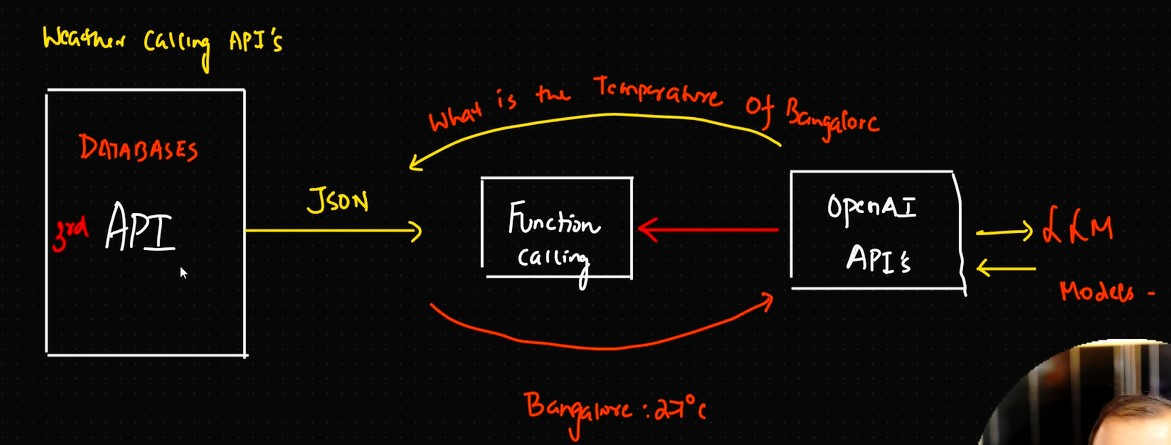

In [1]:
import openai
from dotenv import load_dotenv

In [2]:
import os

openai.api_key=os.getenv("OPENAI_API_KEY")

In [3]:
completion=openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a assistant which informs about temperature."},
        {"role": "user", "content": "Hey there"}
    ]
)

In [4]:
print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "Hello! How can I assist you today?"
}


In [16]:


# Example dummy function hard coded to return the same weather
# In production, this could be your backend API or an external API
import requests
def get_current_weather(location):
    """Get the current weather in a given location"""

    url = "https://ai-weather-by-meteosource.p.rapidapi.com/find_places"

    querystring = {"text":location}

    headers = {
      "X-RapidAPI-Key": "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
      "X-RapidAPI-Host": "ai-weather-by-meteosource.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    print(response.json())
  
    return response.json()



In [17]:
response=get_current_weather('Jodhpur')

[{'name': 'Jodhpur', 'place_id': 'jodhpur', 'adm_area1': 'Rajasthan', 'adm_area2': 'Jodhpur', 'country': 'India', 'lat': '26.26841N', 'lon': '73.00594E', 'timezone': 'Asia/Kolkata', 'type': 'settlement'}, {'name': 'Jodhpur', 'place_id': 'jodhpur-1268866', 'adm_area1': 'Gujarat', 'adm_area2': 'Jamnagar', 'country': 'India', 'lat': '21.90174N', 'lon': '70.0327E', 'timezone': 'Asia/Kolkata', 'type': 'settlement'}, {'name': 'Jodhpur', 'place_id': 'jodhpur-10017225', 'adm_area1': 'Punjab', 'adm_area2': 'Firozpur', 'country': 'India', 'lat': '30.13245N', 'lon': '74.37523E', 'timezone': 'Asia/Kolkata', 'type': 'settlement'}, {'name': 'Jodhpur', 'place_id': 'jodhpur-10255884', 'adm_area1': 'Punjab', 'adm_area2': 'Barnala', 'country': 'India', 'lat': '30.37987N', 'lon': '75.45562E', 'timezone': 'Asia/Kolkata', 'type': 'settlement'}, {'name': 'Jodhpur', 'place_id': 'jodhpur-10435896', 'adm_area1': 'Punjab', 'adm_area2': 'Rupnagar', 'country': 'India', 'lat': '30.94385N', 'lon': '76.64368E', 'tim

In [18]:


response



[{'name': 'Jodhpur',
  'place_id': 'jodhpur',
  'adm_area1': 'Rajasthan',
  'adm_area2': 'Jodhpur',
  'country': 'India',
  'lat': '26.26841N',
  'lon': '73.00594E',
  'timezone': 'Asia/Kolkata',
  'type': 'settlement'},
 {'name': 'Jodhpur',
  'place_id': 'jodhpur-1268866',
  'adm_area1': 'Gujarat',
  'adm_area2': 'Jamnagar',
  'country': 'India',
  'lat': '21.90174N',
  'lon': '70.0327E',
  'timezone': 'Asia/Kolkata',
  'type': 'settlement'},
 {'name': 'Jodhpur',
  'place_id': 'jodhpur-10017225',
  'adm_area1': 'Punjab',
  'adm_area2': 'Firozpur',
  'country': 'India',
  'lat': '30.13245N',
  'lon': '74.37523E',
  'timezone': 'Asia/Kolkata',
  'type': 'settlement'},
 {'name': 'Jodhpur',
  'place_id': 'jodhpur-10255884',
  'adm_area1': 'Punjab',
  'adm_area2': 'Barnala',
  'country': 'India',
  'lat': '30.37987N',
  'lon': '75.45562E',
  'timezone': 'Asia/Kolkata',
  'type': 'settlement'},
 {'name': 'Jodhpur',
  'place_id': 'jodhpur-10435896',
  'adm_area1': 'Punjab',
  'adm_area2': 'R

In [19]:
functions = [
        {
            "name": "get_current_weather",
            "description": "Get the current weather in a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The city and state, e.g. San Francisco, CA",
                    },
                    
                },
                "required": ["location"],
            },
        }
    ]

In [20]:
functions

[{'name': 'get_current_weather',
  'description': 'Get the current weather in a given location',
  'parameters': {'type': 'object',
   'properties': {'location': {'type': 'string',
     'description': 'The city and state, e.g. San Francisco, CA'}},
   'required': ['location']}}]

In [21]:
user_message="Hi There"
messages=[]
messages.append({"role": "user", "content":user_message})
completion=openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=
       messages
    
)

In [22]:
print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "Hello! How can I assist you today?"
}


In [23]:
messages

[{'role': 'user', 'content': 'Hi There'}]

In [24]:
user_message="What is the temperature of Jodhpur-Rajasthan?"

messages.append({"role": "user", "content": user_message})
completion=openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions
    
)



In [25]:
messages

[{'role': 'user', 'content': 'Hi There'},
 {'role': 'user', 'content': 'What is the temperature of Jodhpur-Rajasthan?'}]

In [26]:
completion

<OpenAIObject chat.completion id=chatcmpl-7YSUbtccFQCxM6WCklNgc67jt5DGk at 0x1480157c220> JSON: {
  "id": "chatcmpl-7YSUbtccFQCxM6WCklNgc67jt5DGk",
  "object": "chat.completion",
  "created": 1688447033,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "get_current_weather",
          "arguments": "{\n  \"location\": \"Jodhpur, Rajasthan\"\n}"
        }
      },
      "finish_reason": "function_call"
    }
  ],
  "usage": {
    "prompt_tokens": 82,
    "completion_tokens": 21,
    "total_tokens": 103
  }
}

In [27]:
response=completion.choices[0].message

In [28]:
response

<OpenAIObject at 0x148015a0ea0> JSON: {
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_current_weather",
    "arguments": "{\n  \"location\": \"Jodhpur, Rajasthan\"\n}"
  }
}

In [29]:
function_name=response['function_call']['name']
print(function_name)

get_current_weather


In [30]:
import json
location=eval(response['function_call']['arguments'])['location']
print(location)

Jodhpur, Rajasthan


In [31]:
# Step 4: send the info on the function call and function response to GPT
messages.append(response)  # extend conversation with assistant's reply
messages.append(
    {
        "role": "function",
        "name": function_name,
        "content": location,
    }
)

In [32]:
messages

[{'role': 'user', 'content': 'Hi There'},
 {'role': 'user', 'content': 'What is the temperature of Jodhpur-Rajasthan?'},
 <OpenAIObject at 0x148015a0ea0> JSON: {
   "role": "assistant",
   "content": null,
   "function_call": {
     "name": "get_current_weather",
     "arguments": "{\n  \"location\": \"Jodhpur, Rajasthan\"\n}"
   }
 },
 {'role': 'function',
  'name': 'get_current_weather',
  'content': 'Jodhpur, Rajasthan'}]

In [33]:
# extend conversation with function response
second_response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions
)  # get a new response from GPT where it can see the function response

In [34]:
print(second_response.choices[0].message)

{
  "role": "assistant",
  "content": "The current temperature in Jodhpur, Rajasthan is 34\u00b0C."
}


In [35]:


second_response



<OpenAIObject chat.completion id=chatcmpl-7YSaF25J0RMjFi0F403573CHczvus at 0x1480157cc20> JSON: {
  "id": "chatcmpl-7YSaF25J0RMjFi0F403573CHczvus",
  "object": "chat.completion",
  "created": 1688447383,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "The current temperature in Jodhpur, Rajasthan is 34\u00b0C."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 118,
    "completion_tokens": 16,
    "total_tokens": 134
  }
}